### Student Information
Name: Jeremy Robert (張景行)

Student ID: 111006217

GitHub ID: zhangjingxing

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# import libraries

# For data manipulation and numerical calculations
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# my functions
import helpers.data_mining_helpers as dmh

# import our dataset, change the path according to yours
file_path = r"D:\Disk E\Jeremy\NTHU\Kuliah\Sem 7\Data Mining\HW\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv"
# load the CSV file into a DataFrame
df = pd.read_csv(file_path) # we can directly import a csv file as dataframe

len(df) #want to see how many rows for our dataset


847

### >>> Exercise 1
Print out the first 3 samples

In [2]:
# Previously, we imported the dataset from the library and it's a specific container object 
# which has attributes like .data and .target, so we could use that to print out some data

# here, our data is csv, and we use other way to print
df.head(5) #this is to take a peek, 3 first row, and see the columns

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### >>> Exercise 2
Experiment with some querying techniques of pandas dataframe



In [3]:
# finding all posts with a positive sentiment (1.0)

# we use np.isclose() to compare floating-point numbers
positive_posts = df[np.isclose(df['sentiment'], 1.0)]
positive_posts.head() # print the first 5 records with that condition

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0


### >>> Exercise 3
Fetch records belonging to type = post, query every 10th record, and show the first 5 records.

In [4]:
df[df['type'] == 'post'][::10][0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,2025-04-09 14:01:01,1jv6i3y,stockstobuytoday,Established Uptrend,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,2025-04-11 18:25:25,1jwwv42,wallstreetbets,$75k+ In Gains (300% YTD),KatBoss01,https://www.reddit.com/gallery/1jwwv42,5,0.0,1.00,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,2025-03-31 14:05:30,1jo3zpc,stockstobuytoday,Stock Gainers for Today,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,2021-12-25 0:40:59,rnypxo,stockstobuytoday,Deep value vs Dividend!,AnonymusFarmer,https://www.reddit.com/r/stockstobuytoday/comm...,9,0.0,0.91,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


In [5]:
# check missing values
df.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [6]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

# here we can clearly see in which columns our dataset contains missing values
# turns out, downvote and upvote columns contain lots of missing values

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> Exercise 4
Calculating missing values in every record instead of every column

In [7]:
# we just use the given function from our helper file
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

Here we try dropping some records with missing values, hopefully, we not deleting too much record

In [8]:
new_df = df.dropna(inplace=False)
new_df
len(new_df) # from 847 records, we only have 64 left with no missing values
# i dont think this method is good

64

In [9]:
# another approach is to:
# 1. drop downvote column : it contains too many missing values to be useful
# 2. do imputation for upvote_ratio : it is valuable enough tobe saved

new_df = df.drop(columns=['downvotes'], inplace=False)

median_ratio = df['upvote_ratio'].median()
new_df['upvote_ratio'].fillna(median_ratio, inplace=True)



C:\Users\JEREMY\AppData\Local\Temp\ipykernel_51984\2161409901.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['upvote_ratio'].fillna(median_ratio, inplace=True)


In [10]:
# See our new dataset
new_df

# we succesfully remove the downvote and added median for upvote ratio


,type,datetime,post_id,subreddit,title,author,url,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,1.00,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,1.00,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,1.00,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,1.00,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,1.00,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,1.00,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,1.00,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [11]:
# Make sure are there still any missing values

new_df.isnull().apply(lambda x: dmh.check_missing_values(x))


,type,datetime,post_id,subreddit,title,author,url,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 5
(We dont have it here, because in master file it was just learning about .isnull(), and try to differentiate which cases are real null or not)

Check for duplicate data

In [12]:
sum(new_df.duplicated())

# we have no duplicated records, so no need further processing

0

### >>> Exercise 6
Making sample from our dataset (with random seed)

In [13]:
# actually our dataset is quite small, only 847 records
# i personally think we dont need sampling
# here, we just reduced a bit, just to do this exercise

df_sample = new_df.sample(n = 500, random_state= 42)
df_sample[:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,1.0,"""We"" who?",0.000000,0.000000,0.0,[],0.0
342,comment,2025-04-12 3:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,1.0,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,1.0,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0
275,comment,2025-04-12 2:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,1.0,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0


In [14]:
len(df_sample)

500

### >>> Exercise 7
Make a bar chart that automatically set the ylim parameters

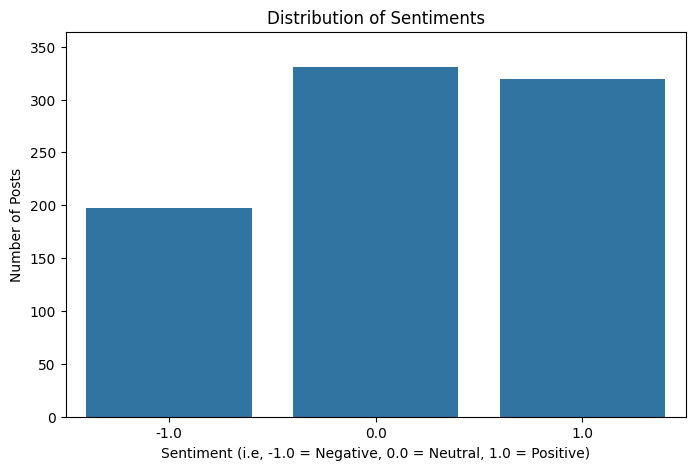

In [15]:
# count the number of occurences of each type in 'sentiment' column

sentiment_counts = df['sentiment'].value_counts()

# look for the max occurences, for the ylim
max_count = sentiment_counts.max()

buffer = max_count * 0.1 # we add a small number for ylim, to be visually appealing (have some space up there)

plt.figure(figsize=(8 , 5))

sns.barplot(x=sentiment_counts.index,  y = sentiment_counts.values)

plt.ylim(0, max_count + buffer)

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (i.e, -1.0 = Negative, 0.0 = Neutral, 1.0 = Positive)')
plt.ylabel('Number of Posts')
plt.show()

### >>> Exercise 8
Comparing side by side between df and sample of df

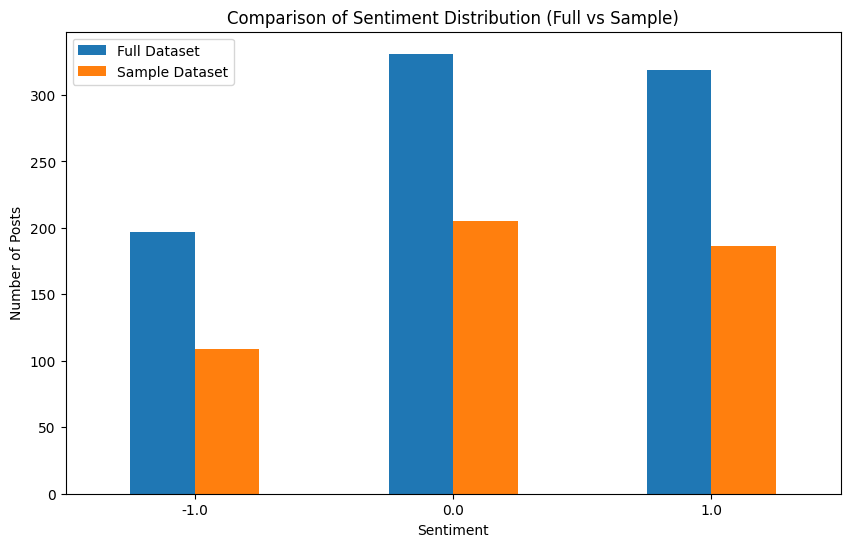

In [16]:
# same as before, count the number of sentiments
counts_df = df['sentiment'].value_counts()
counts_sample = df_sample['sentiment'].value_counts()

#combine into the same dataframe
compariso_df = pd.DataFrame({'Full Dataset' : counts_df,
                             'Sample Dataset' : counts_sample})

compariso_df = compariso_df.sort_index() # to make the bar exactly negative, neutral, positivbe

ax = compariso_df.plot(kind='bar', figsize=(10, 6), rot = 0)

plt.title('Comparison of Sentiment Distribution (Full vs Sample)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')

plt.legend()
plt.show()

# here it shows that the sampled data shows the same trend
# as the full dataset. It shows that sampling is also 
# a good way to downsize

Making new column 'unigrams'

In [17]:
# tokenize out 'text' field
# Here we just use the full dataset, cause our dataset records are not that much
# the sampling above just a demonstration if we need a sample

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [18]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [19]:
df[:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


Default analyzer provided by CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [21]:
analyze = count_vect.build_analyzer()
analyze("Expecting for winter break soon")

['expecting', 'for', 'winter', 'break', 'soon']

### >>> Exercise 9
Analyze the first record of our dataframe with the new analyzer we just built


In [22]:
analyze(df.text[0])

['calls', 'on', 'retards']

In [23]:
df_counts.shape



(847, 4346)

In [24]:
count_vect.get_feature_names_out()[:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

Extract the first five records and transform into document-term matrix (2D matrix)

In [25]:
df_counts[:5, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### >>> Exercise 10
Finding out what word actually present in that matrix. In this case in our 4th record, we have a word that has count = 3, lets find out what that is

In [26]:
# first, retrieve the entire vocab list
vocab = count_vect.get_feature_names_out()

# slice the matrix just to take the 5th document and the first 100 words
first_100cols = df_counts[:4, :100]

# This will take the indices of those 100 columns whose value > 0
word_indices = first_100cols.indices

# We look for what are the words there, using the columns index previously collected
present_words = vocab[word_indices]

# print out all the words present
print(present_words)


['116']


### >>> Exercise 11
We want a better visualization that gives meaninful information. 

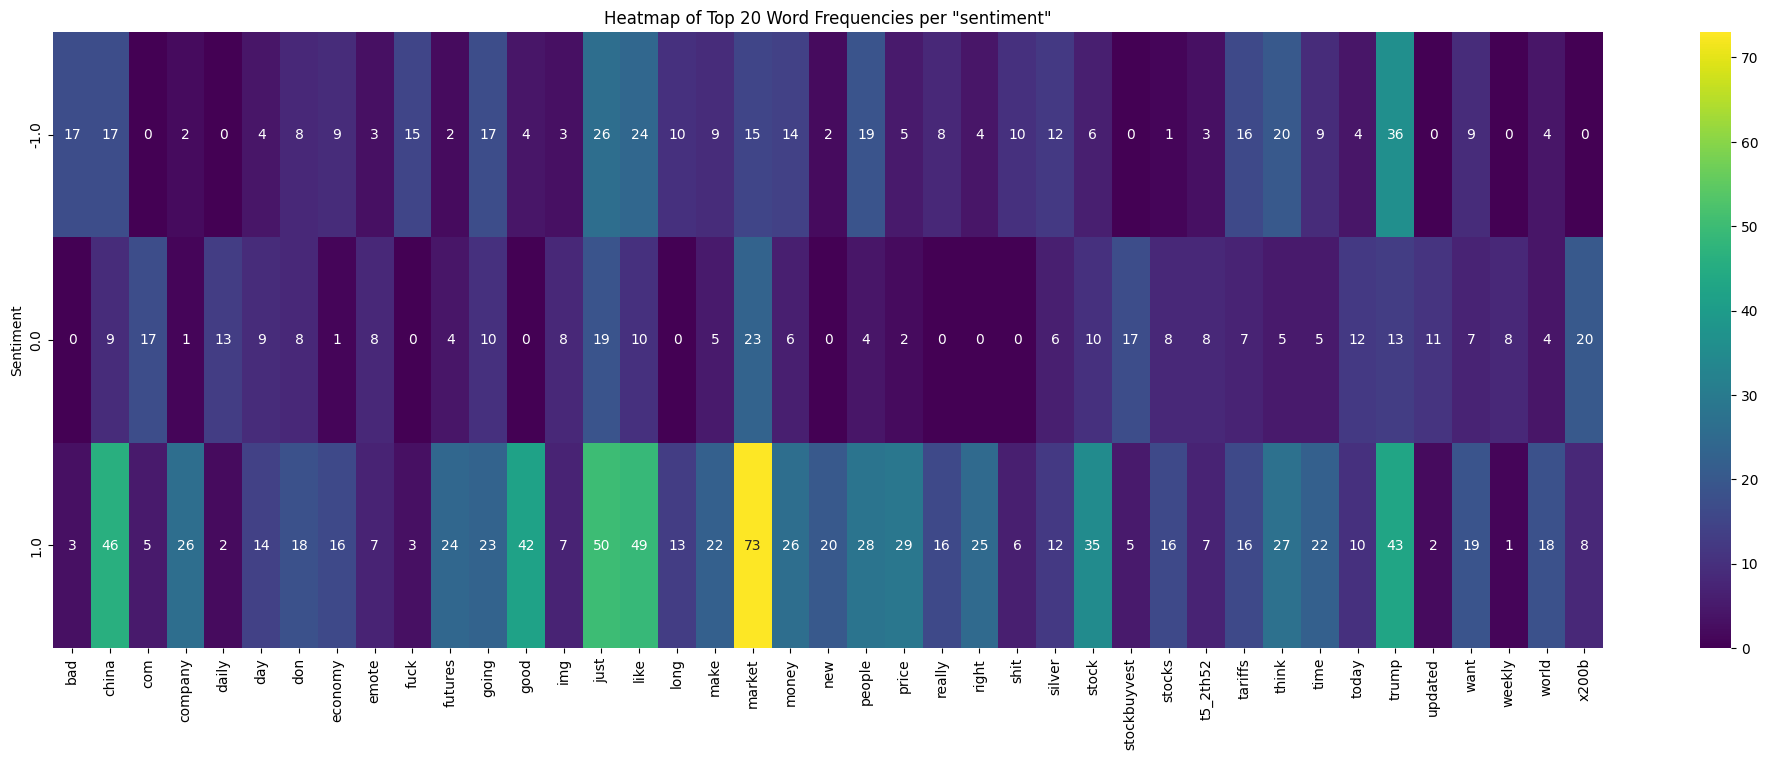

In [27]:
# here we just use the methode in the master file, so copy and adjust
# define the column we want to annalyze
text_column = 'text'
category_column = 'sentiment'

# create a big document for each category
# .dropna() handles any missing text safely
category_text = df.dropna(subset=[text_column]).groupby(category_column)[text_column].apply(' '.join)

# vectorize the text, removing common English stop words
cat_vect = CountVectorizer(stop_words='english')
category_counts = cat_vect.fit_transform(category_text)

# find the top N words for EACH category
n_top_words = 20
top_indices_per_category = []
for i in range(category_counts.shape[0]):
    row = category_counts.toarray()[i]
    top_indices = row.argsort()[-n_top_words:][::-1]
    top_indices_per_category.extend(top_indices)

# get the unique set of all top indices
unique_top_indices = np.unique(top_indices_per_category)
top_terms = cat_vect.get_feature_names_out()[unique_top_indices]

# create the DataFrame for the heatmap
heatmap_df = pd.DataFrame(category_counts[:, unique_top_indices].toarray(),
                          index=category_text.index,
                          columns=top_terms)

# plot the heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='viridis')
plt.title(f'Heatmap of Top {n_top_words} Word Frequencies per "{category_column}"')
plt.ylabel(category_column.title())
plt.show()



In [61]:
# observation:
# negative sentiment (-1.0) tends to have words like shit, fuck, and bad
# positive sentiment tends to have words like good, futures


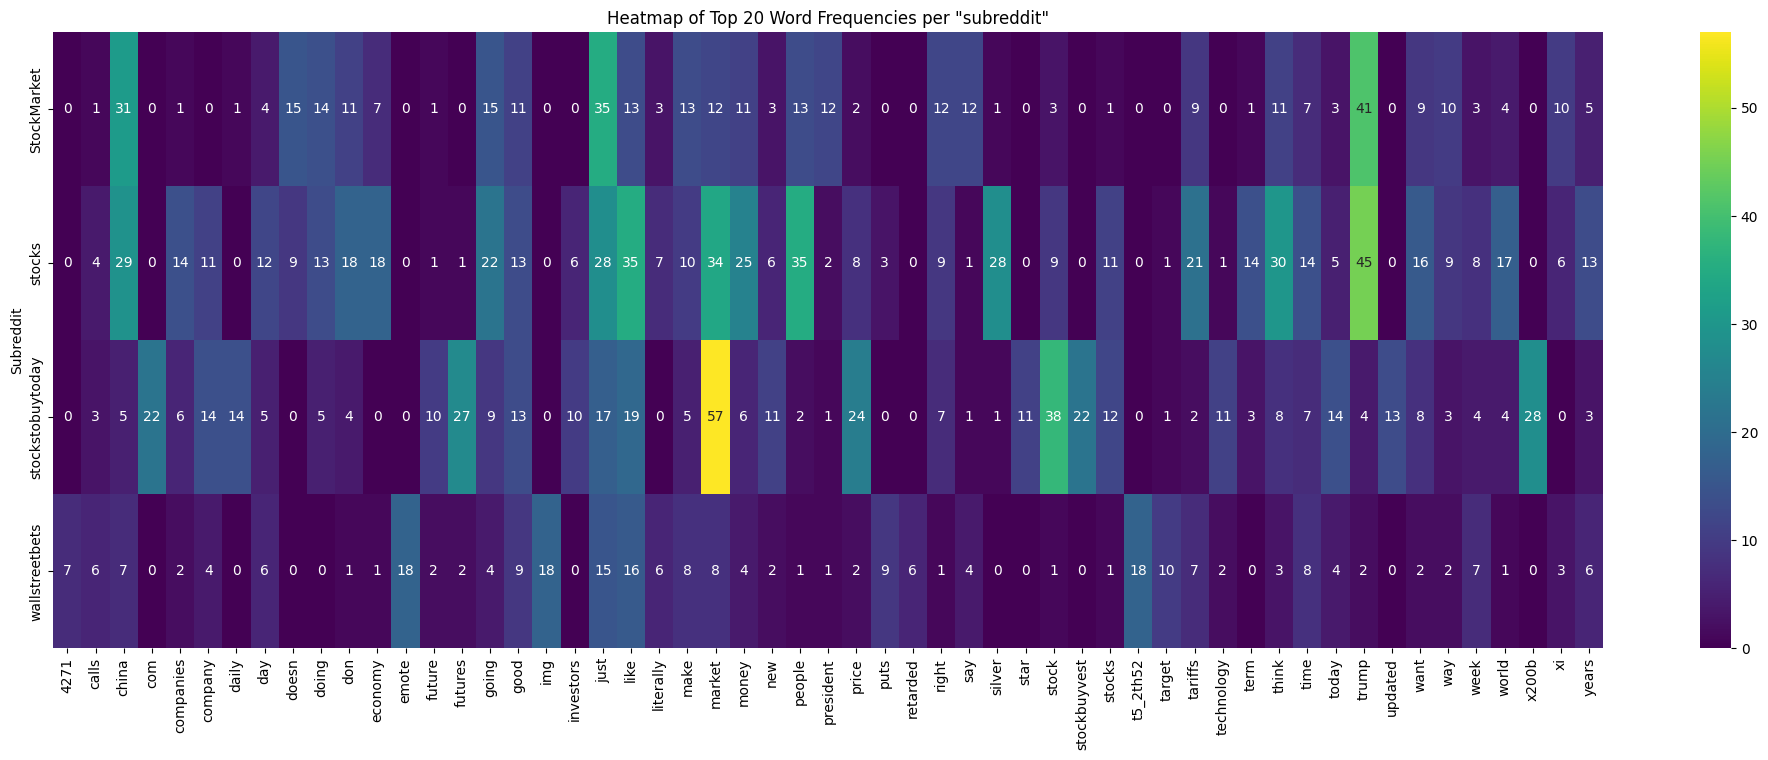

In [28]:
# here we just copy the code above, but now we analyze the subreddit category instead of sentiment
# define the column we want to annalyze
text_column = 'text'
category_column = 'subreddit'

# create a big document for each category
# .dropna() handles any missing text safely
category_text = df.dropna(subset=[text_column]).groupby(category_column)[text_column].apply(' '.join)

# vectorize the text, removing common English stop words
cat_vect = CountVectorizer(stop_words='english')
category_counts = cat_vect.fit_transform(category_text)

# find the top N words for EACH category
n_top_words = 20
top_indices_per_category = []
for i in range(category_counts.shape[0]):
    row = category_counts.toarray()[i]
    top_indices = row.argsort()[-n_top_words:][::-1]
    top_indices_per_category.extend(top_indices)

# get the unique set of all top indices
unique_top_indices = np.unique(top_indices_per_category)
top_terms = cat_vect.get_feature_names_out()[unique_top_indices]

# create the DataFrame for the heatmap
heatmap_df = pd.DataFrame(category_counts[:, unique_top_indices].toarray(),
                          index=category_text.index,
                          columns=top_terms)

# plot the heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='viridis')
plt.title(f'Heatmap of Top {n_top_words} Word Frequencies per "{category_column}"')
plt.ylabel(category_column.title())
plt.show()


In [88]:
# observation
# some subreddit community has its own unique term, like wallstreetbets has word 'retarded'
# a well known slang within that community subculture
# subreddit stocks and StockMarket contain high frequency of words 'china', 'market', and 'stock'
# stockstobuytoday : contains high frequency of word 'futures', 'price', 'stock'


### >>>Another Useful Visualization

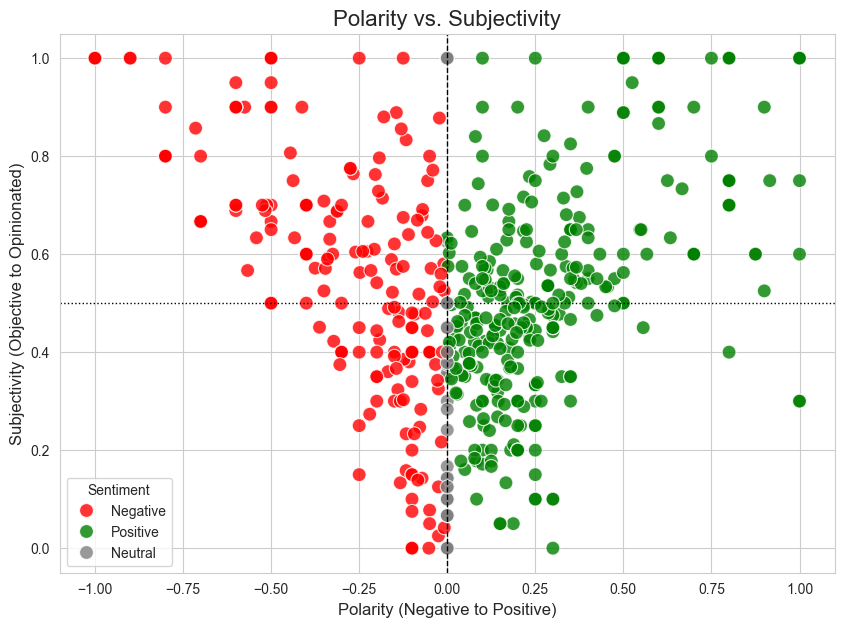

In [42]:
# Now, we map subjectivity vs polarity, to see their relationship
#creating label for the legend
sentiment_map = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
df['sentiment_label'] = df['sentiment'].map(sentiment_map)

# set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))

# create the scatter plot 
ax = sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='sentiment_label',
                     palette={'Positive':'green', 'Neutral':'grey', 'Negative':'red'}, s=100, alpha=0.8)

# add titles and labels
ax.set_title('Polarity vs. Subjectivity', fontsize=16)
ax.set_xlabel('Polarity (Negative to Positive)', fontsize=12)
ax.set_ylabel('Subjectivity (Objective to Opinionated)', fontsize=12)
ax.legend(title='Sentiment')

# add helper lines
ax.axvline(0, color='k', linestyle='--', linewidth=1)
ax.axhline(0.5, color='k', linestyle=':', linewidth=1)

# save the figure
plt.savefig('polarity_vs_subjectivity.png')

### Observation: We can see here there is V kinda shape, where at lower subjectivity values, it tends to be neutral in polarity, meanwhile, for highly polar value (very negative or positiv), we can clearly see that the subjectivity is higher. Highly opinionated and subjective comments are the ones that tend to be strongly positive or negative. In contrast, comments that are more objective and factual are typically neutral in tone. 

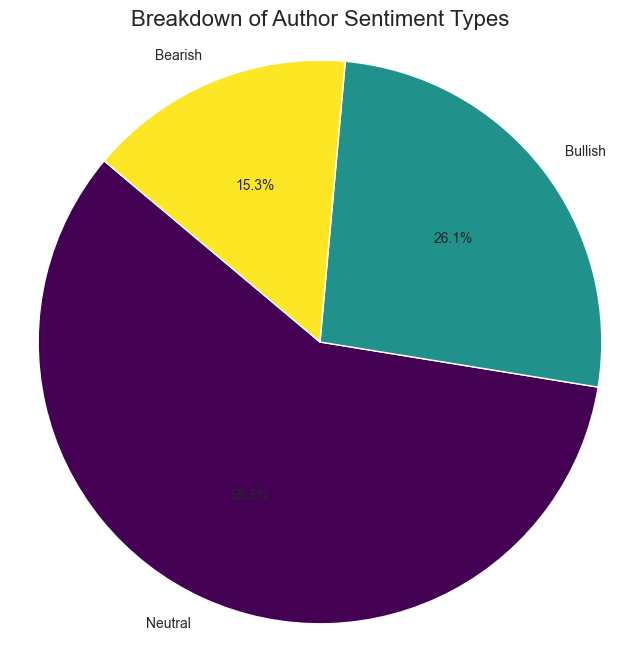

In [66]:
# group by author and calculate the mean polarity
author_sentiments = df.groupby('author')['polarity'].mean().reset_index()

#categorize each author

# define a function to classify authors based on their average sentiment
def categorize_author(mean_polarity):
    if mean_polarity > 0.15:
        return 'Bullish'  # Consistently positive posters
    elif mean_polarity < -0.15:
        return 'Bearish'  # Consistently negative posters
    else:
        return 'Neutral'  # Neutral or mixed posters

# apply the function to create a new 'type' column
author_sentiments['type'] = author_sentiments['polarity'].apply(categorize_author)

# count types and creat chart

# get the count of each author type
type_counts = author_sentiments['type'].value_counts()

# create the visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 8))

plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%', # adds the percentage label to each slice
    startangle=140,
    colors=['#440154', '#21918c', '#fde725'] # Example color palette
)

plt.title('Breakdown of Author Sentiment Types', fontsize=16)
plt.axis('equal')  # ensures the pie chart is a perfect circle
plt.savefig('author_sentiment_pie_chart.png')
plt.show()


### Insight: majority is neutral. This large neutral group likely consists of users who share news, ask questions, or post objective data without a strong emotional bias. They form the informational backbone of the community. While not the majority, the "Bullish" authors still make up a substantial quarter of the user base. This is the group that likely proposes new trade ideas, shares success stories, and drives the optimistic conversations. The consistently "Bearish" authors are the smallest group. They provide the counter-arguments and skeptical viewpoints, but they are a less dominant force compared to the neutral and bullish contributors.

### >>> Exercise 12
Interactive visualization for frequency bar chart for words

In [29]:
term_frequencies = df_counts.sum(axis=0).A1

In [30]:
# copy our master code, similar task
# create a DataFrame with ALL terms and their frequencies
freq_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# 2. Sort the DataFrame by the 'Frequency' column to find the most frequent words
sorted_freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# 3. Now, select the top N words from the SORTED DataFrame
num_terms_to_plot = 300
top_df = sorted_freq_df.head(num_terms_to_plot)


# --- The rest of your plotting code is correct and will now work as intended ---

fig = px.bar(top_df,
             x='Term',
             y='Frequency',
             labels={'Term': 'Word', 'Frequency': 'Total Count'},
             hover_name='Term',
             hover_data={'Frequency': True, 'Term': False}
             )

fig.update_layout(
    title_text=f'Top {num_terms_to_plot} Most Frequent Words',
    title_x=0.5,
    title_xanchor='center',
    xaxis_tickangle=-45
)
fig.show()

### >>> Exercise 13

Here, we can see it contains many unimportant engluish words like the, that, be, but, was, or
Now, we want to effieciently reduce the number of terms we want to visualize


In [31]:
# same method as in my master, using min and max

# min_df: ignores words that appear in too few documents (usually these are typos, rare names, or noise)
# max_df: ignores words that appear in too many docs (they usually are the template like used in all data, so it doesnt help to differentiate categories)

vect = CountVectorizer(stop_words='english', #we cut off common english words
                       min_df=5, #means minimum it appears in 5 docs to be considered, but yeah these 2 are hyperparameters we can do trial and error
                       max_df=0.85, #means max it appears in 85% of our docs
                       max_features=10000) #we can also still put limit

df_counts_reduced = vect.fit_transform(df.text)

# calc the freq from new reduced matrix
term_frequencies_reduced = df_counts_reduced.sum(axis=0).A1
vocab_reduced = vect.get_feature_names_out() #collect the words

freq_df_reduced = pd.DataFrame({'Term' : vocab_reduced, 'Frequency': term_frequencies_reduced}) #make dataframe


num_terms_to_plot = 300 #set our words limit
top_df = freq_df_reduced.head(num_terms_to_plot)

#same plotting as befor
fig = px.bar(top_df,
             x='Term',
             y='Frequency',
             labels={'Term': 'Word', 'Frequency': 'Total Count'},
             hover_name='Term',
             hover_data={'Frequency': True, 'Term': False}
             )

fig.update_layout(
    title_text=f'Top {num_terms_to_plot} Most Frequent Words (from Reduced Vocabulary)',
    title_x=0.5,
    title_xanchor='center',
    xaxis_tickangle=-45
)
fig.show()

### >>> Exercise 14
Now, show it sorted to see the long tail

In [32]:
#just add the sorting

vect = CountVectorizer(stop_words='english', #we cut off common english words
                       min_df=5, #means minimum it appears in 5 docs to be considered, but yeah these 2 are hyperparameters we can do trial and error
                       max_df=0.85, #means max it appears in 85% of our docs
                       max_features=10000) #we can also still put limit

df_counts_reduced = vect.fit_transform(df.text)

# calc the freq from new reduced matrix
term_frequencies_reduced = df_counts_reduced.sum(axis=0).A1
vocab_reduced = vect.get_feature_names_out() #collect the words

freq_df_reduced = pd.DataFrame({'Term' : vocab_reduced, 'Frequency': term_frequencies_reduced}) #make dataframe
sorted_freq_df_reduced = freq_df_reduced.sort_values(by='Frequency', ascending=False)


num_terms_to_plot = 300 #set our words limit
top_df = sorted_freq_df_reduced.head(num_terms_to_plot)

#same plotting as befor
fig = px.bar(top_df,
             x='Term',
             y='Frequency',
             labels={'Term': 'Word', 'Frequency': 'Total Count'},
             hover_name='Term',
             hover_data={'Frequency': True, 'Term': False}
             )

fig.update_layout(
    title_text=f'Top {num_terms_to_plot} Most Frequent Words (from Reduced Vocabulary)',
    title_x=0.5,
    title_xanchor='center',
    xaxis_tickangle=-45
)
fig.show()

### >>> Exercise 15
Now, we introduce log function to our graph above to see it in a better scaling


In [33]:
#just add the log function

vect = CountVectorizer(stop_words='english', #we cut off common english words
                       min_df=5, #means minimum it appears in 5 docs to be considered, but yeah these 2 are hyperparameters we can do trial and error
                       max_df=0.85, #means max it appears in 85% of our docs
                       max_features=10000) #we can also still put limit

df_counts_reduced = vect.fit_transform(df.text)

# calc the freq from new reduced matrix
term_frequencies_reduced = df_counts_reduced.sum(axis=0).A1
vocab_reduced = vect.get_feature_names_out() #collect the words

freq_df_reduced = pd.DataFrame({'Term' : vocab_reduced, 'Frequency': term_frequencies_reduced}) #make dataframe
sorted_freq_df_reduced = freq_df_reduced.sort_values(by='Frequency', ascending=False)


num_terms_to_plot = 300 #set our words limit
top_df = sorted_freq_df_reduced.head(num_terms_to_plot)

#same plotting as befor
fig = px.bar(top_df,
             x='Term',
             y='Frequency',
             log_y= True, # enabling long for freq
             labels={'Term': 'Word', 'Frequency': 'Total Count'},
             hover_name='Term',
             hover_data={'Frequency': True, 'Term': False}
             )

fig.update_layout(
    title_text=f'Top {num_terms_to_plot} Most Frequent Words (from Reduced Vocabulary)',
    title_x=0.5,
    title_xanchor='center',
    xaxis_tickangle=-45
)
fig.show()

Observation: before log, it's hard to see the difference betwenn some of low frequency words, because the most frequent word are dominating the scale of the chart
but then, we introduced log, and log is good cause its not showing the absolute differences (e.g., 2000 is 1000 more than 1000), rather, it shows multiplicative differences (or ratios). On a log scale, the visual distance between 10 and 100 is the same as the distance between 100 and 1000, because both are a 10x increase.

# Phase 2

In [ ]:
### Begin Assignment Here